In [108]:
#Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [150]:
#Load and Preprocess Data
df = pd.read_csv('energy_production_data.csv', 
                parse_dates=['timestamp']
                )
# Check if 'timestamp' is properly parsed as datetime
print(df['timestamp'].dtype)
print(df.head())

datetime64[ns]
   timestamp  energy_production  temperature
0 2018-01-01          19.422163    29.424069
1 2018-01-02          11.160701    20.637519
2 2018-01-03          93.587858    18.340461
3 2018-01-04         179.331702    20.207211
4 2018-01-05          90.720340    23.515103


In [152]:
# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

#Simple Preprocessing: Convert time stamp to useful features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

# Verify the conversion
print(df[['timestamp', 'hour', 'day', 'month', 'year']].head())

   timestamp  hour  day  month  year
0 2018-01-01     0    1      1  2018
1 2018-01-02     0    2      1  2018
2 2018-01-03     0    3      1  2018
3 2018-01-04     0    4      1  2018
4 2018-01-05     0    5      1  2018


In [154]:
# Feature Engineering and data splitting
X = df[['day', 'month', 'year', 'temperature']]
y = df['energy_production']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [156]:
#Initialize and Train the RandomForestRegressor
model = RandomForestRegressor(
    n_estimators = 1000,
    random_state = 42,
)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [157]:
# Making Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE : {rmse}")

RMSE : 204.46662587709298


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


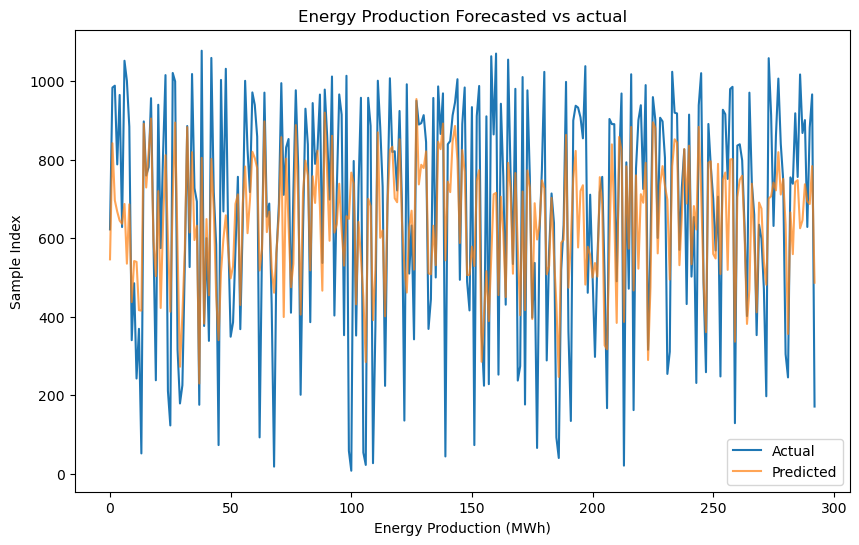

In [97]:
#Visualization
plt.figure(figsize = (10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_pred, label ='Predicted', alpha =0.7)
plt.legend()
plt.title('Energy Production Forecasted vs actual')
plt.xlabel('Energy Production (MWh)')
plt.ylabel('Sample Index')
plt.show()